PHASE 3:

✅ Missing values after cleaning:
LDT          0
TYPE         0
BUILT        0
LAST_FLAG    0
dtype: int64

✅ Accuracy: 0.3470
✅ F1-score: 0.2799

                          precision    recall  f1-score   support

               Australia       0.00      0.00      0.00         1
              Bangladesh       0.50      0.00      0.01       246
                 Belgium       0.00      0.00      0.00         7
                  Brazil       0.00      0.00      0.00         1
          Canary Islands       0.00      0.00      0.00         0
                   China       0.42      0.57      0.49        82
                  China        0.00      0.00      0.00         2
                 China         0.00      0.00      0.00         3
                    Cuba       0.00      0.00      0.00         1
                 Denmark       0.00      0.00      0.00        11
                Denmark        0.00      0.00      0.00         1
      Dominican Republic       0.00      0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

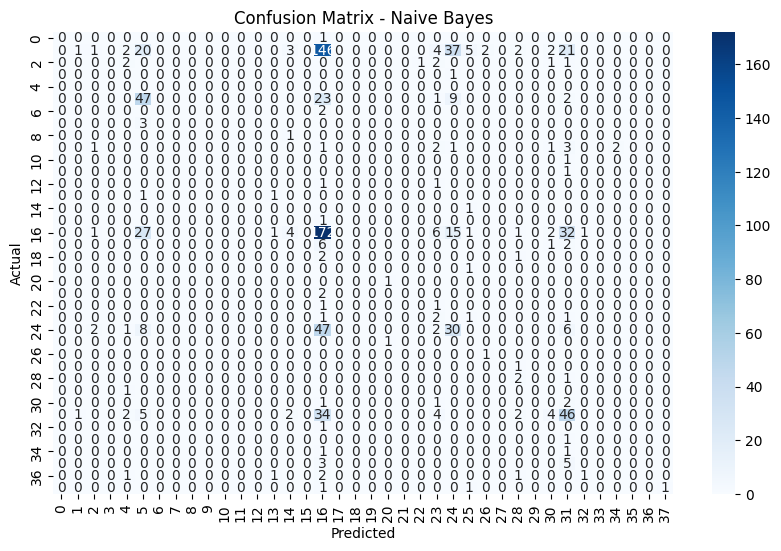

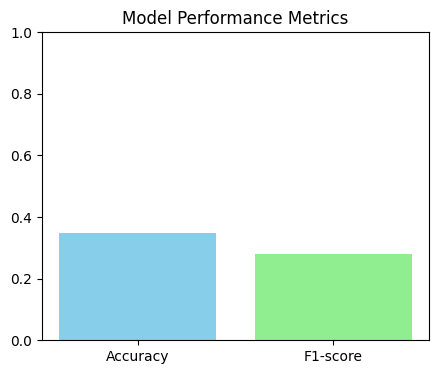

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
df = pd.read_csv("ships_all_complete_imputed.csv")

# 2️⃣ Choose relevant columns (EXCLUDING PREVIOUS_FLAG)
features = ['LDT', 'TYPE', 'BUILT', 'LAST_FLAG']
target = 'COUNTRY'   # or 'REGION' if you created one earlier

X = df[features].copy()
y = df[target].copy()

# 3️⃣ Encode categorical columns
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col].astype(str))

# 4️⃣ Handle missing values (impute numeric + categorical)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col] = num_imputer.fit_transform(X[[col]])
    else:
        X[col] = cat_imputer.fit_transform(X[[col]])

print("✅ Missing values after cleaning:")
print(X.isna().sum())

# 5️⃣ Split data (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6️⃣ Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7️⃣ Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}\n")
print(classification_report(y_test, y_pred))

# 8️⃣ Confusion Matrix Visualization
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Bar chart for accuracy and F1
plt.figure(figsize=(5,4))
plt.bar(['Accuracy', 'F1-score'], [accuracy, f1], color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.show()


REGION MAPPING

✅ Missing values after cleaning:
LDT          0
TYPE         0
BUILT        0
LAST_FLAG    0
dtype: int64

✅ Accuracy: 0.3493
✅ F1-score: 0.2847

               precision    recall  f1-score   support

    East Asia       0.24      0.79      0.36        85
Other Regions       0.32      0.89      0.48       186
   South Asia       0.89      0.12      0.22       605

     accuracy                           0.35       876
    macro avg       0.48      0.60      0.35       876
 weighted avg       0.71      0.35      0.28       876



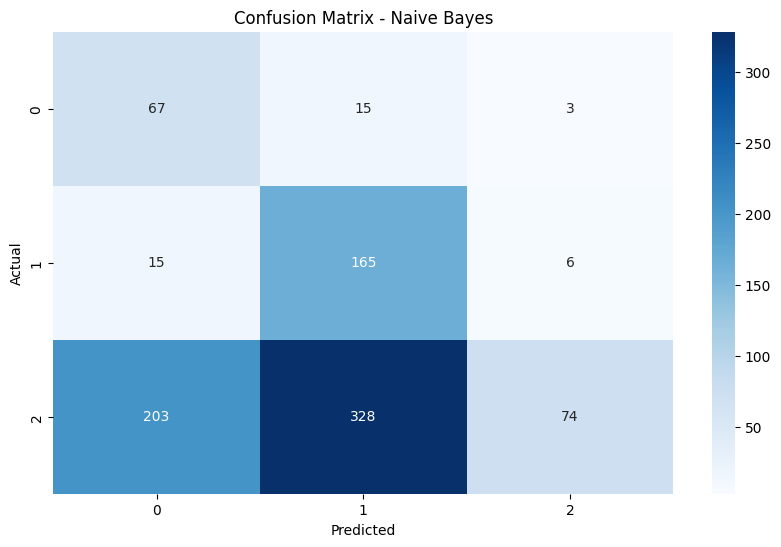

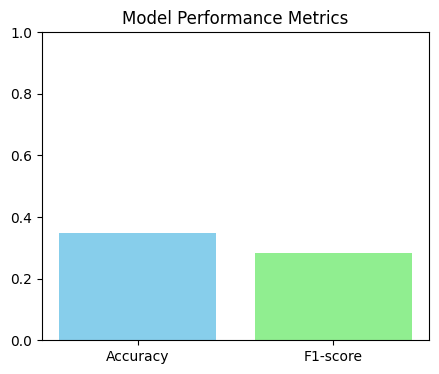

In [2]:
# Create region mapping
def map_region(country):
    if country in ['India', 'Bangladesh', 'Pakistan']:
        return 'South Asia'
    elif country in ['China', 'South Korea', 'Korea (South)', 'Japan']:
        return 'East Asia'
    else:
        return 'Other Regions'

df['REGION'] = df['COUNTRY'].apply(map_region)

# Then redefine target
target = 'REGION'

# Redefine X, y
X = df[features].copy()
y = df[target].copy()

# 3️⃣ Encode categorical columns
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col].astype(str))

# 4️⃣ Handle missing values (impute numeric + categorical)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col] = num_imputer.fit_transform(X[[col]])
    else:
        X[col] = cat_imputer.fit_transform(X[[col]])

print("✅ Missing values after cleaning:")
print(X.isna().sum())

# 5️⃣ Split data (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6️⃣ Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7️⃣ Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}\n")
print(classification_report(y_test, y_pred))

# 8️⃣ Confusion Matrix Visualization
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Bar chart for accuracy and F1
plt.figure(figsize=(5,4))
plt.bar(['Accuracy', 'F1-score'], [accuracy, f1], color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.show()



CORRELATION ANALYSIS

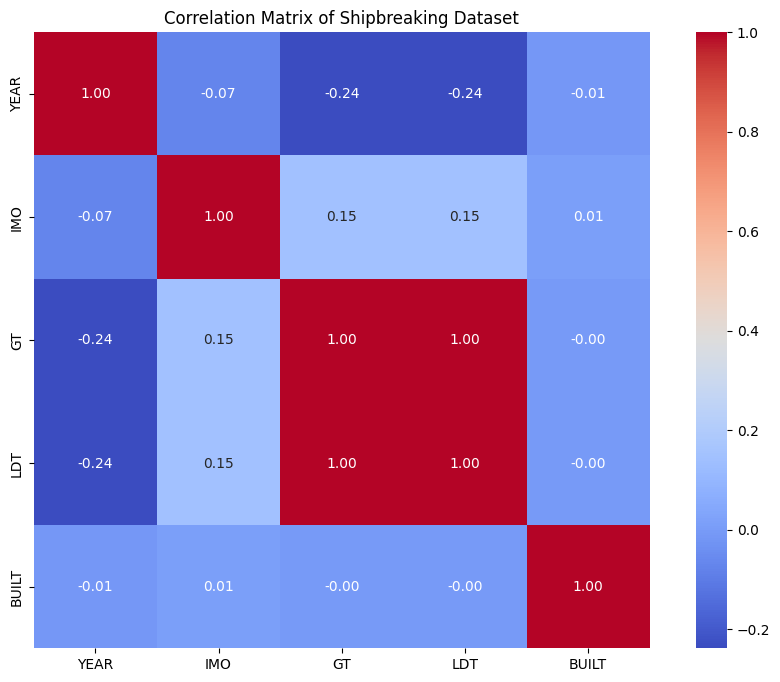


🔝 Top 10 strongest correlations:

Feature_1 Feature_2  Correlation  AbsCorrelation
      LDT        GT     0.999952        0.999952
       GT       LDT     0.999952        0.999952
     YEAR        GT    -0.238321        0.238321
       GT      YEAR    -0.238321        0.238321
     YEAR       LDT    -0.238315        0.238315
      LDT      YEAR    -0.238315        0.238315
      IMO       LDT     0.147001        0.147001
      LDT       IMO     0.147001        0.147001
       GT       IMO     0.146755        0.146755
      IMO        GT     0.146755        0.146755


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Load dataset
df = pd.read_csv("ships_all_complete_imputed.csv")

# 2️⃣ Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 3️⃣ Compute correlation matrix
corr_matrix = numeric_df.corr()

# 4️⃣ Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Shipbreaking Dataset")
plt.show()

# 5️⃣ Sort correlation pairs (excluding self-correlations)
corr_pairs = (
    corr_matrix.unstack()
    .reset_index()
    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0: 'Correlation'})
)

# Remove duplicate pairs and self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature_1'] != corr_pairs['Feature_2']]
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)

# 6️⃣ Display top 10 strongest correlations
print("\n🔝 Top 10 strongest correlations:\n")
print(corr_pairs.head(10).to_string(index=False))


COUNTRY LEVEL INSIGHTS

/tmp/ipython-input-2648854901.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='Ship_Count', y='RO_COUNTRY', ax=axes[0], palette='viridis')
/tmp/ipython-input-2648854901.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


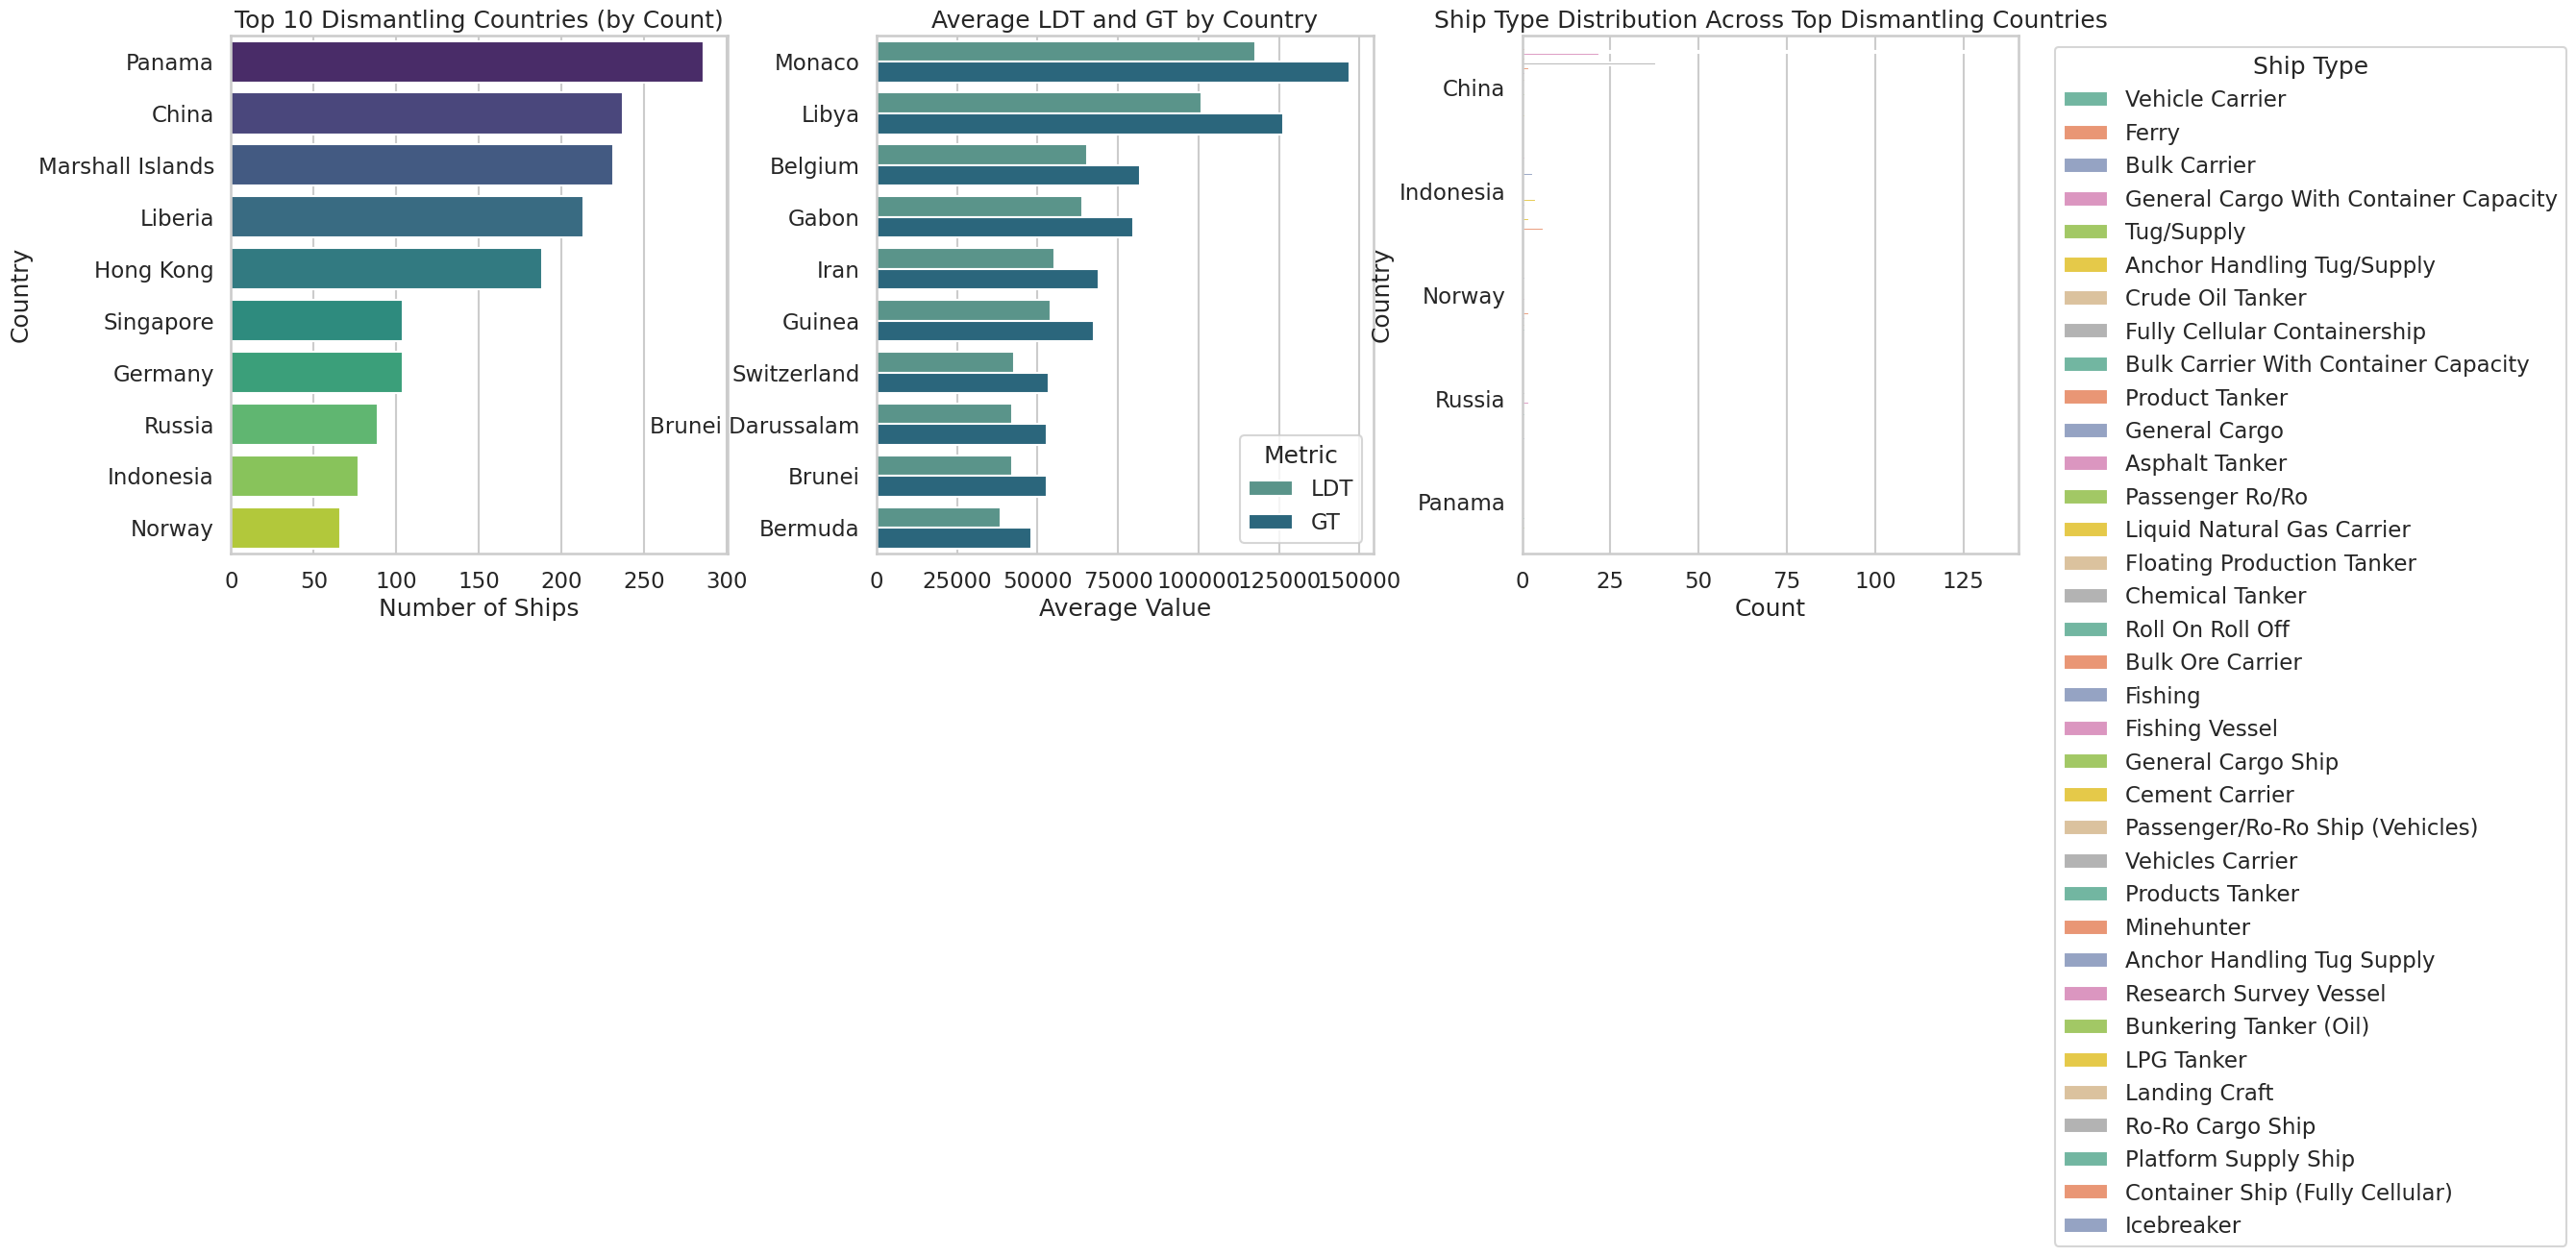

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("ships_all_complete_imputed.csv")

# Set Seaborn theme
sns.set(style="whitegrid", palette="deep", context="talk")

# 1️⃣ Top countries by number of dismantled ships
country_counts = df['RO_COUNTRY'].value_counts().head(10).reset_index()
country_counts.columns = ['RO_COUNTRY', 'Ship_Count']

# 2️⃣ Average LDT and GT per country (top 10)
avg_metrics = df.groupby('RO_COUNTRY')[['LDT', 'GT']].mean().reset_index()
avg_metrics = avg_metrics.sort_values('LDT', ascending=False).head(10)

# 3️⃣ Distribution of ship types across top dismantling countries
top_countries = country_counts['RO_COUNTRY']
shiptype_dist = df[df['COUNTRY'].isin(top_countries)]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
plt.subplots_adjust(wspace=0.3)

# Plot 1: Top dismantling countries
sns.barplot(data=country_counts, x='Ship_Count', y='RO_COUNTRY', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Dismantling Countries (by Count)')
axes[0].set_xlabel('Number of Ships')
axes[0].set_ylabel('Country')

# Plot 2: Average LDT & GT per country
avg_melted = avg_metrics.melt(id_vars='RO_COUNTRY', value_vars=['LDT', 'GT'], var_name='Metric', value_name='Average')
sns.barplot(data=avg_melted, x='Average', y='RO_COUNTRY', hue='Metric', ax=axes[1], palette='crest')
axes[1].set_title('Average LDT and GT by Country')
axes[1].set_xlabel('Average Value')
axes[1].set_ylabel('')
axes[1].legend(title='Metric')

# Plot 3: Ship type distribution
sns.countplot(data=shiptype_dist, y='COUNTRY', hue='TYPE', ax=axes[2], palette='Set2')
axes[2].set_title('Ship Type Distribution Across Top Dismantling Countries')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Country')
axes[2].legend(title='Ship Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


TEMPORAL TRENDS

/tmp/ipython-input-4119796526.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ldt_per_year, x='YEAR', y='LDT', ax=axes[0], palette='viridis')


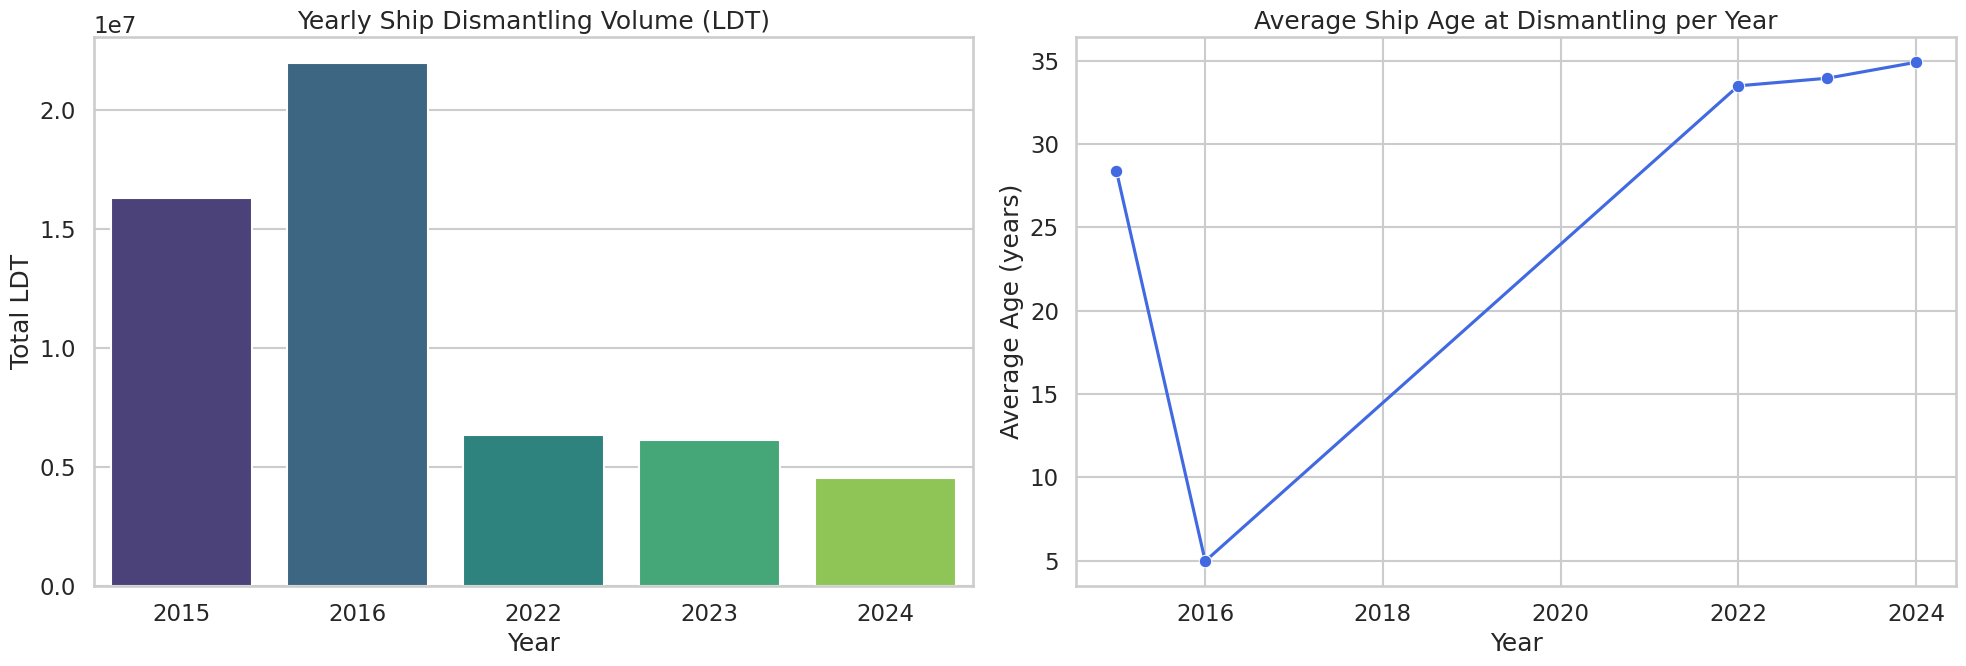

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ships_all_complete_imputed.csv")

# Ensure numeric types
df['LDT'] = pd.to_numeric(df['LDT'], errors='coerce')
df['BUILT'] = pd.to_numeric(df['BUILT'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Calculate ship age at dismantling
df['AGE'] = df['YEAR'] - df['BUILT']

# Set Seaborn style
sns.set(style="whitegrid", palette="deep", context="talk")

# Aggregate data
ldt_per_year = df.groupby('YEAR')['LDT'].sum().reset_index()
avg_age_per_year = df.groupby('YEAR')['AGE'].mean().reset_index()

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
plt.subplots_adjust(wspace=0.3)

# Plot 1: Yearly dismantling volume
sns.barplot(data=ldt_per_year, x='YEAR', y='LDT', ax=axes[0], palette='viridis')
axes[0].set_title('Yearly Ship Dismantling Volume (LDT)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total LDT')

# Plot 2: Average ship age per year
sns.lineplot(data=avg_age_per_year, x='YEAR', y='AGE', marker='o', ax=axes[1], color='royalblue')
axes[1].set_title('Average Ship Age at Dismantling per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Age (years)')

plt.tight_layout()
plt.show()


SHIP TYPE INSIGHTS

/tmp/ipython-input-3765545950.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_types, x='count', y='TYPE', ax=axes[0], palette='viridis')
/tmp/ipython-input-3765545950.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_types, x='avg_age', y='TYPE', ax=axes[1], palette='coolwarm')
/tmp/ipython-input-3765545950.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_types, x='avg_ldt', y='TYPE', ax=axes[2], palette='magma')


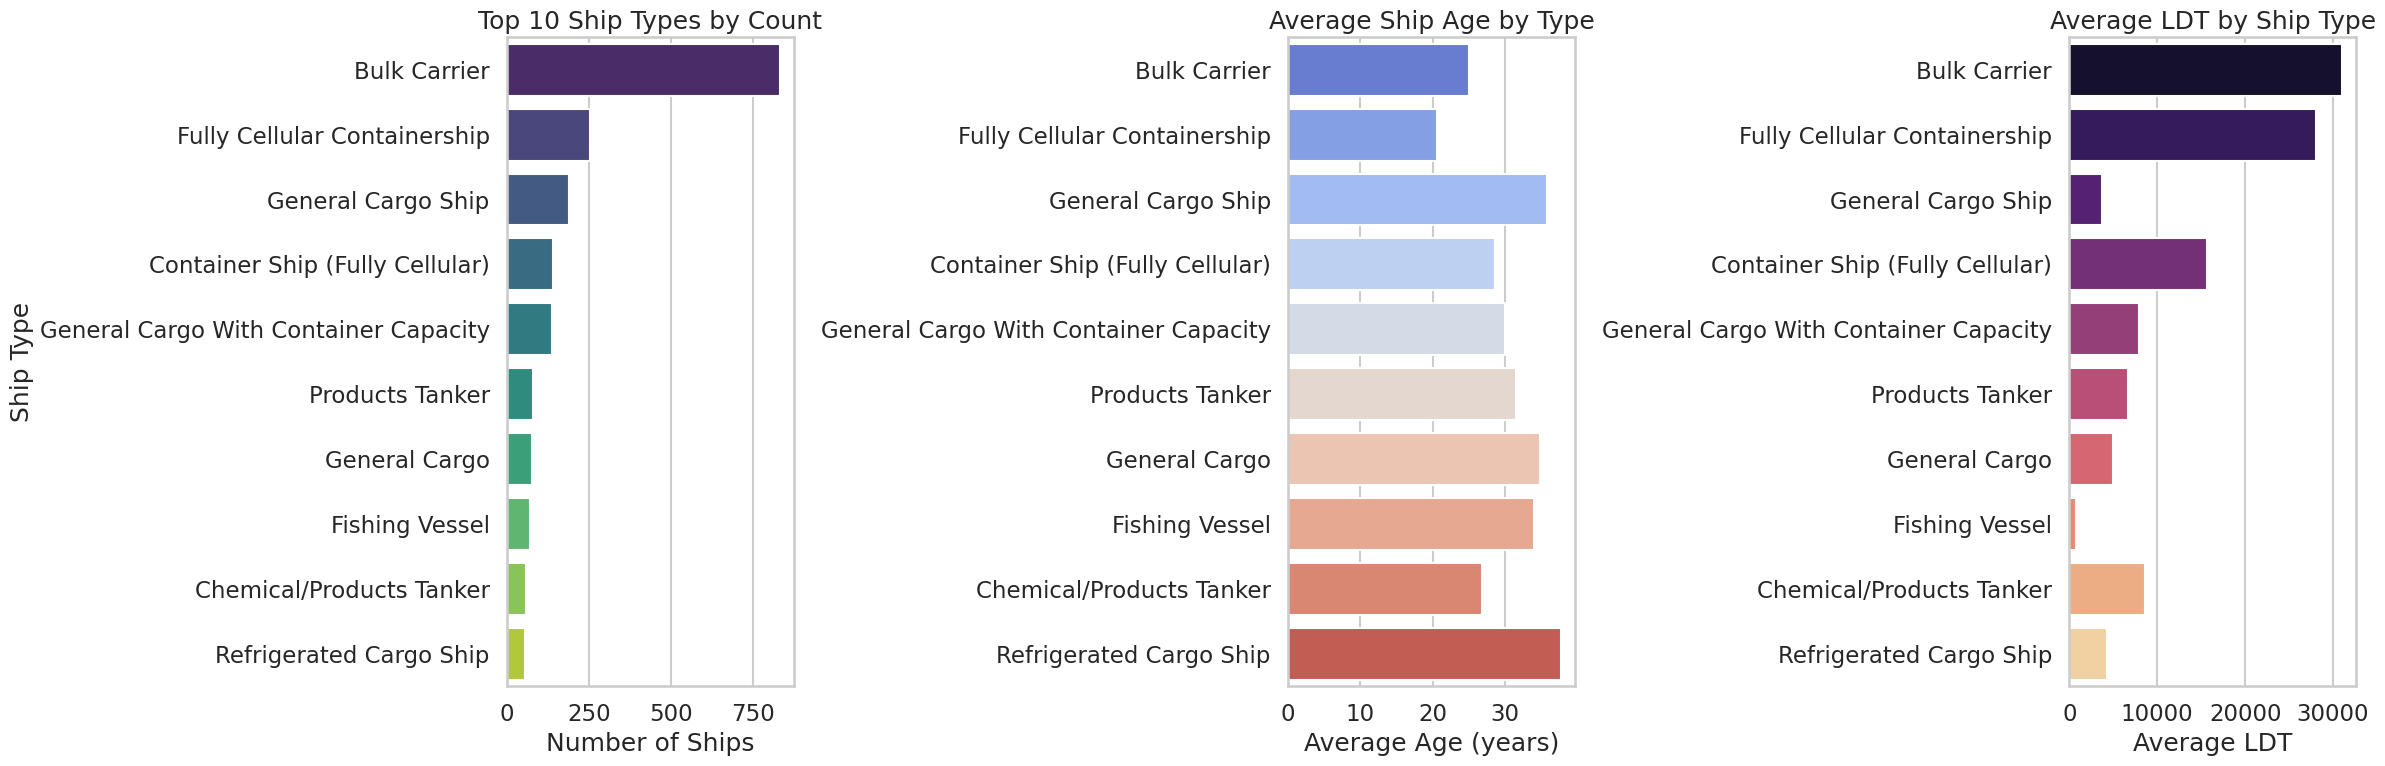

In [6]:
# Ensure numeric columns
df['LDT'] = pd.to_numeric(df['LDT'], errors='coerce')
df['AGE'] = df['YEAR'] - df['BUILT']

# Aggregate stats
ship_type_stats = df.groupby('TYPE').agg(
    count=('NAME', 'count'),
    avg_age=('AGE', 'mean'),
    avg_ldt=('LDT', 'mean')
).reset_index()

# Take top 10 ship types by count
top_types = ship_type_stats.sort_values('count', ascending=False).head(10)

# Set Seaborn style
sns.set(style="whitegrid", palette="muted", context="talk")

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
plt.subplots_adjust(wspace=0.5)

# Count of ships
sns.barplot(data=top_types, x='count', y='TYPE', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Ship Types by Count')
axes[0].set_xlabel('Number of Ships')
axes[0].set_ylabel('Ship Type')

# Average age
sns.barplot(data=top_types, x='avg_age', y='TYPE', ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Ship Age by Type')
axes[1].set_xlabel('Average Age (years)')
axes[1].set_ylabel('')

# Average LDT
sns.barplot(data=top_types, x='avg_ldt', y='TYPE', ax=axes[2], palette='magma')
axes[2].set_title('Average LDT by Ship Type')
axes[2].set_xlabel('Average LDT')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


REGION BASED DISMANTLING INSIGHT

/tmp/ipython-input-3013149053.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_age.sort_values('avg_age', ascending=False),


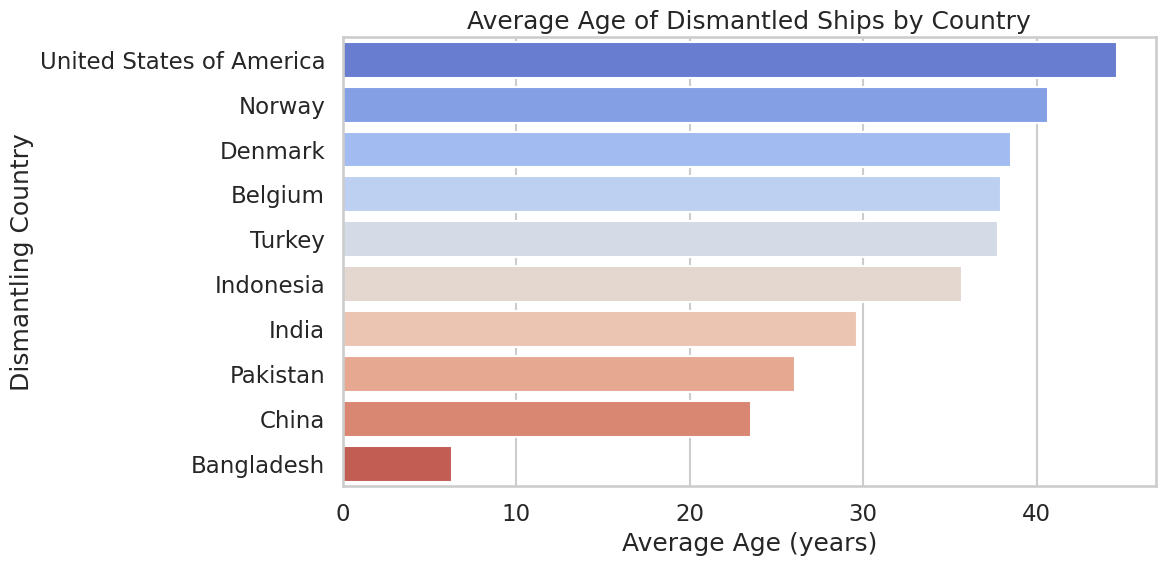

In [7]:
# Ensure AGE column exists
df['AGE'] = df['YEAR'] - df['BUILT']

# Calculate average age per dismantling country
country_age = df.groupby('COUNTRY').agg(
    avg_age=('AGE', 'mean'),
    ship_count=('NAME', 'count')
).reset_index()

# Keep only countries with significant number of ships (e.g., >20)
country_age = country_age[country_age['ship_count'] > 20]

# Seaborn style
sns.set(style="whitegrid", palette="muted", context="talk")

# Plot average age per country
plt.figure(figsize=(12,6))
sns.barplot(data=country_age.sort_values('avg_age', ascending=False),
            x='avg_age', y='COUNTRY', palette='coolwarm')
plt.title('Average Age of Dismantled Ships by Country')
plt.xlabel('Average Age (years)')
plt.ylabel('Dismantling Country')
plt.tight_layout()
plt.show()




/tmp/ipython-input-1532997759.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_country = df.groupby(['COUNTRY', 'AGE_BIN']).size().reset_index(name='count')


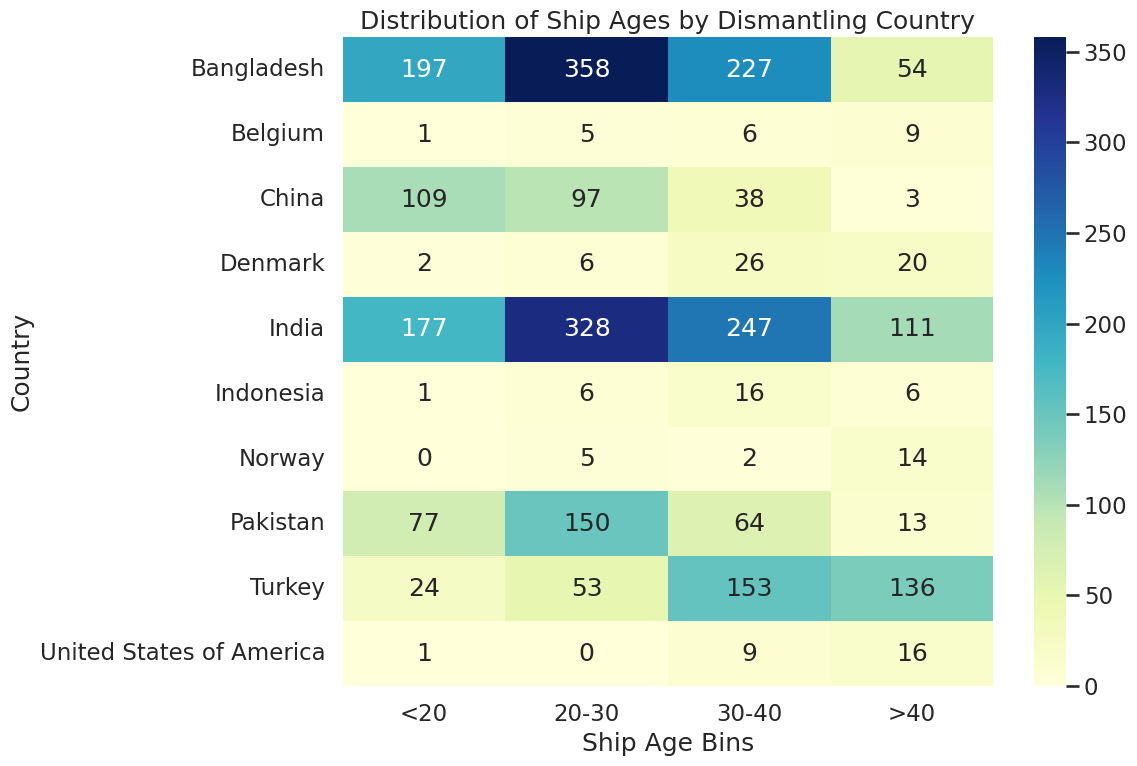

In [8]:
# Create age bins
bins = [0, 20, 30, 40, 100]
labels = ['<20','20-30','30-40','>40']
df['AGE_BIN'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Aggregate counts per country and age bin
age_country = df.groupby(['COUNTRY', 'AGE_BIN']).size().reset_index(name='count')

# Pivot for heatmap
age_pivot = age_country.pivot(index='COUNTRY', columns='AGE_BIN', values='count').fillna(0)

# Keep only countries with sufficient data
age_pivot = age_pivot[age_pivot.sum(axis=1) > 20]

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(age_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Distribution of Ship Ages by Dismantling Country')
plt.ylabel('Country')
plt.xlabel('Ship Age Bins')
plt.tight_layout()
plt.show()
